## Question 1 - B:

#### Chart Number 1:  Average Survey results and Satisfaction scores at each Unit at the organization

In [19]:
import pandas as pd
import numpy as np

raw_df = pd.read_csv("TMA_Data.csv")
df = raw_df.filter(['Unit', 'Survey', 'Satisfaction'])

In [20]:
grouped_df = df.groupby('Unit')['Satisfaction','Survey'].mean() #Group by Units and get Mean of Satisfaction & Survey Columns of these groups
grouped_df  = grouped_df.drop(grouped_df.index[[1]])        #Drop C-Level Since Sample too small ( < 2)
print(grouped_df)   

               Satisfaction    Survey
Unit                                 
Admin              3.571429  4.642857
Engineering        4.200000  4.048000
IT                 4.048780  4.237317
Manufacturing      3.893491  4.184320
Sales              4.181818  3.990455


C:\Users\Hp\AppData\Local\Temp\ipykernel_12144\1698776536.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = df.groupby('Unit')['Satisfaction','Survey'].mean() #Group by Units and get Mean of Satisfaction & Survey Columns of these groups


<AxesSubplot:title={'center':'Satisfaction score per Units'}, xlabel='Unit', ylabel='Average Score'>

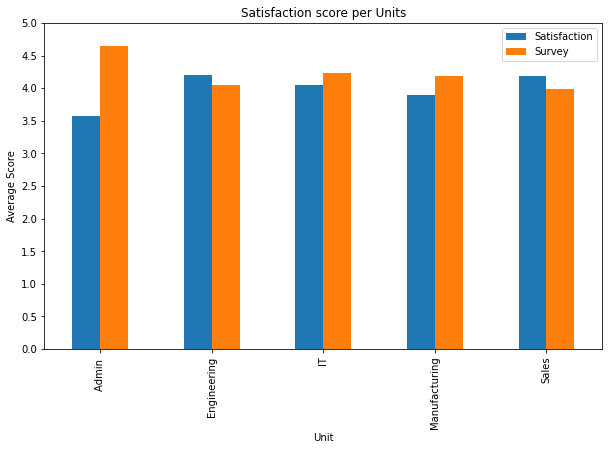

In [21]:
grouped_df.plot(kind='bar', title='Satisfaction score per Units',
               ylabel='Average Score', xlabel='Unit', figsize=(10, 6), yticks = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])

#### Chart Number 2:  Number of days of absence in the previous year relative to the Marital Status

In [22]:
import pandas as pd
import numpy as np

raw_df = pd.read_csv("TMA_Data.csv")
df = raw_df.filter(['Marital', 'Absence'])

In [23]:
grouped_df = df.groupby('Marital')['Absence'].mean()        #Group by Units and get Mean of Satisfaction & Survey Columns of these groups
print(grouped_df)                                           #Summarised Table

Marital
Divorced     9.576923
Married     11.095745
Others       8.875000
Single      10.035088
Name: Absence, dtype: float64


<AxesSubplot:title={'center':'Average Absence by Marital Status'}, ylabel='Marital Status'>

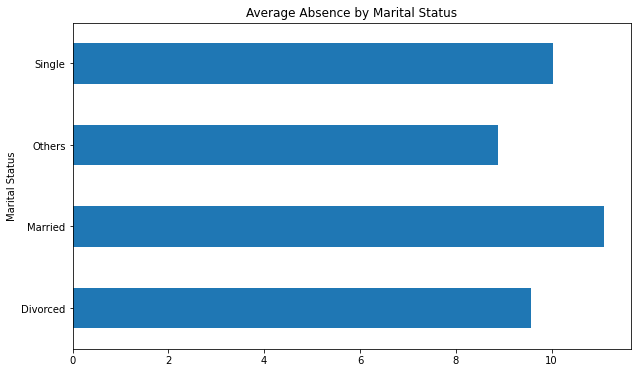

In [24]:
grouped_df.plot(kind='barh', title='Average Absence by Marital Status',
               ylabel='Average Absence', xlabel='Marital Status', figsize=(10, 6))

## Question 1 - C:

In [25]:
import pandas as pd
import numpy as np

raw_df = pd.read_csv("TMA_Data.csv")
df = raw_df.filter(['Staff', 'JoinDate', 'LeftDate'])

In [26]:
default_leftDate = '5/1/2022'
df['LeftDate'].fillna(value = default_leftDate,inplace = True)

In [27]:
from datetime import datetime

def calc_serviceTime(a,b):
    D_a = datetime.strptime(a, "%m/%d/%Y")
    D_b = datetime.strptime(b, "%m/%d/%Y")
    diff_days= abs((D_a - D_b).days)
    return diff_days/365


df['Length of Service']  = df.apply(lambda f: calc_serviceTime(f['JoinDate'],f['LeftDate']), axis=1)

max_Service = round(df['Length of Service'].max(),1)
min_Service = round(df['Length of Service'].min(),1)
mean_Service = round(df['Length of Service'].mean(),1)

print("Maximum Length of Service (In Years): ", max_Service)
print("Minimum Length of Service (In Years): ", min_Service)
print("Average Length of Service (In Years): ", mean_Service)

Maximum Length of Service (In Years):  16.3
Minimum Length of Service (In Years):  0.1
Average Length of Service (In Years):  6.8


## Question 1 - D:

In [28]:
import pandas as pd
import numpy as np

raw_df = pd.read_csv("TMA_Data.csv")
df = raw_df.filter(['Staff'])

In [30]:
input_Prompt = "Welcome to Employee Query System, Input Full Name to Query, 0 to Quit"

while(True):
    print(input_Prompt)
    Query = input("Please input the Full Name of the Employee (0 to Quit): ")
    if (Query == "0"):
        print("Quitting the Employee Query System")
        break
    if Query in df["Staff"].values:
        print("Yes," , Query , "is found in the organization’s records")
    else:
        print("No," , Query , "is NOT found in the organization’s records")

Welcome to Employee Query System, Input Full Name to Query, 0 to Quit
Yes, Alena Galvan is found in the organization’s records
Welcome to Employee Query System, Input Full Name to Query, 0 to Quit
No, Joe Doe is NOT found in the organization’s records
Welcome to Employee Query System, Input Full Name to Query, 0 to Quit
Quitting the Employee Query System
